In [ ]:
#librosa
# Fourier transformation
# In case of DL spectrogram , mel-spectogram , Mel-Frequesncy Cepstral Coefficent(MFCC) are used as DL will extract the 
#   feature by its own.


# Spectogram : 
* It is a visual representation of spectrum of frquecy of audio varies with time.
* Includes both frequency and time.
* This spectogram is obtained by **Short-time Fourier Transform on the audio signal** by applysing **Fast Fourier Transform(FFT)** in loacl small framed audio signal.
---
# Mel-Spectogram:

*     As an example we can easily differentaite between the 500Hz and 1000Hz audio frequency signal,But in case of higher frequency like between 10000Hz and 10100Hz audio frequency signal.For this reason a logarithmic scale "MEL" was introduced.
*     Conversion from frequency (f) to mel scale (m) is given by  m=2595 \cdot log(1+\frac{f}{500}) 
---
# Mel-Frequency Cepstral Coefficients :

![MFCC](https://devopedia.org/images/article/340/9044.1621765887.png)

* The information of the rate of change in spectral bands of a signal is given by its cepstrum.  A cepstrum is basically a spectrum of the log of the spectrum of the time signal. The resulting spectrum is neither in the frequency domain nor in the time domain and hence, it was named the quefrency (an anagram of the word frequency) domain. The Mel-Frequency Cepstral Coefficients (MFCCs) are nothing but the coefficients that make up the mel-frequency cepstrum.

* The cepstrum conveys the different values that construct the formants (a characteristic component of the quality of a speech sound) and timbre of a sound. MFCCs thus are useful for deep learning models.

## Some others feature extraction process : 

1. Band Energy Ratio :
    * The Band Energy Ratio (BER) provides the relation between the lower and higher frequency bands. It can be thought of as the measure of how dominant low frequencies are. This feature has been extensively used in music/speech discrimination, music classification etc.


In [ ]:
! pip install librosa 
! pip install IPython

In [4]:
import librosa
import matplotlib.pyplot as plt

In [2]:
# angry voice
audio_path="../input/audio-emotions/Emotions/Angry/03-01-05-01-01-01-01.wav"
time_series_array,sampling_rate=librosa.load(audio_path,sr=44000)

In [ ]:
# fearful voice
audio_path="../input/audio-emotions/Emotions/Fearful/03-01-06-01-01-01-01.wav"
time_series_array,sampling_rate=librosa.load(audio_path,sr=44000)

In [ ]:
# suprised voice
audio_path="../input/audio-emotions/Emotions/Suprised/03-01-08-01-01-01-01.wav"
time_series_array,sampling_rate=librosa.load(audio_path,sr=44000)

In [ ]:
time_series_array 

In [3]:
import IPython.display as ipd
ipd.Audio(audio_path)

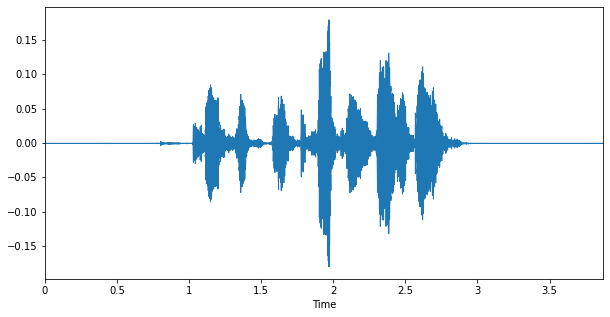

In [5]:
# waveplot
%matplotlib inline
import librosa.display
plt.figure(figsize=(10,5))
librosa.display.waveplot(time_series_array,sr=sampling_rate)

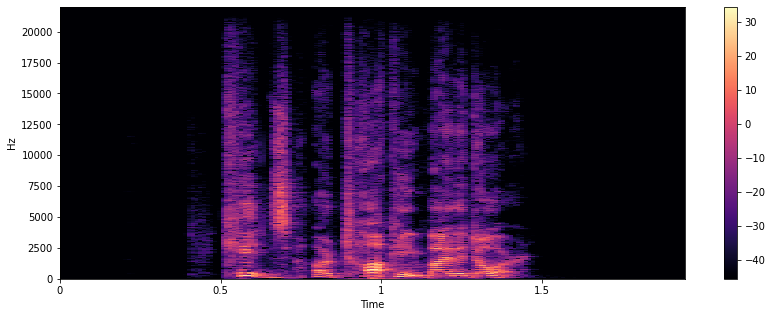

In [6]:
# spectogram plot
# short time fast fourier tranform

stft_time_series=librosa.stft(time_series_array,n_fft=4096, hop_length=1024)
time_series_db=librosa.amplitude_to_db(abs(stft_time_series))
# time_series_db[0]
plt.figure(figsize=(14,5))
librosa.display.specshow(time_series_db, sr=44000, x_axis='time', y_axis='hz') 
plt.colorbar()

In [7]:
import numpy as np

### window_length : 
we need to split the audio clips into various windows of constant frame length and have them cumulatively processed. We call this length as ‘window length’.
### hop_length :
As it is an audio file and to preserve the continuity while processing — we let some frames from subsequent windows to overlap with one another and the actual unique count of frames processed per window is known as ‘hop length’.
### sampling_rate :
The sampling rate is nothing but samples taken per second
### onset :
onset refers to the begining of any musical note or other sound
### zero crossing rate :
The zero crossing rate indicates the number of times that a signal crosses the horizontal axis, i.e. the number of times that the amplitude reaches 0.
### tempogram :
The tempo, measured in Beats Per Minute (BPM) measures the rate of the musical beat. The tempogram is a feature matrix which indicates the prevalence of certain tempi at each moment in time. Librosa has a built-in function to extract this information. It is common to focus only on the first N rows (e.g 13) of the matrix.



In [25]:
class extract_feature:
    def __init__(self,audio_file,sampling_rate):
        self.audio_file=audio_file
        self.sampling_rate=sampling_rate
    def zero_crossing_rate(self):
        # 1.zero crossing rate : the rate at whichthe signal changes to positive from negative and vice-versa.
        zero_crossed_array=librosa.feature.zero_crossing_rate(self.audio_file,pad=False,zero_pos=True,hop_length=1024,frame_length=4096) 
#         plt.figure(figsize=(15, 3))
#         plt.plot(zero_crossed_array.T)
        return zero_crossed_array[0]
    def spectral_centroid(self):
        # it actualluy indicate the center of the mass of that whole sound based upon the frequecy.
        # If there are high frequencies at the end of sound then the centroid would be towards its end.
        spectral_centroid=librosa.feature.spectral_centroid(self.audio_file, sr=self.sampling_rate,n_fft=4096,hop_length=1024)
#         plt.figure(figsize=(15, 3))
#         plt.plot(spectral_centroid[0])
        return spectral_centroid[0]
    def mfcc(self):
#         mfcc is nothing but a coeeficent that actaully makes upto mel-scal(log scale representation to detect small
#         frequency changes).Here frequency bands are represnted by mel scale and we are able to see frq. change easily.
        mfcc=librosa.feature.mfcc(self.audio_file,sr=self.sampling_rate,n_fft=4096,hop_length=1024)
#         librosa.display.specshow(mfcc, sr=self.sampling_rate, x_axis='time')
        return mfcc
    def chroma(self):
#         We can use Chroma feature visualization to know how dominant the characteristics of a certain pitch 
#        {C, C♯, D, D♯, E, F, F♯, G, G♯, A, A♯, B} is present in the sampled frame.
        hop_length = 1024
        chromagram = librosa.feature.chroma_stft(self.audio_file, sr=self.sampling_rate, hop_length=hop_length)
#         fig, ax = plt.subplots(figsize=(15, 3))
#         img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
#         fig.colorbar(img, ax=ax)

        return chromagram
        
    def band_energy_ratio(self):
#         The Band Energy Ratio (BER) provides the relation between the lower and higher frequency bands. 
#         It can be thought of as the measure of how dominant low frequencies are.
#         This feature has been extensively used in music/speech discrimination, music classification etc.
#         High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise.
         ber=librosa.feature.spectral_contrast(self.audio_file,sr=self.sampling_rate,n_fft=4096, hop_length=1024)
#          plt.figure(figsize=(15, 3))
#          plt.plot(ber[0])
         return ber[0]
    def spectral_flux(self):
#         A measure of how quickly the spectrum of a signal is changing. It is calculated by computing frame-to-frame
#         squared difference of the spectral magnitude vector summed across frequency.It provides a measure of the local
#         spectral rate of change. A high value of spectral flux indicates a sudden change in spectral magnitudes and
#         therefore a possible segment boundary at the  rth  frame.
        
        spec_flux= librosa.onset.onset_strength(self.audio_file,sr=self.sampling_rate,n_fft=4096,hop_length=1024)
#         onset_default = librosa.onset.onset_detect(self.audio_file,sr=self.sampling_rate, units='time')
#         plt.figure(figsize=(15, 3))
#         plt.plot(spec_flux)
        return spec_flux
    def spectral_rolloff(self):
#         Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
        spectral_rolloff=librosa.feature.spectral_rolloff(self.audio_file,sr=self.sampling_rate,n_fft=4096,
                                                          hop_length=1024,roll_percent=0.85)
#         plt.figure(figsize=(15, 3))
#         plt.plot(spectral_rolloff[0])
        return spectral_rolloff[0]
    def rms(self):
#         Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.
        rms_val=librosa.feature.rms(self.audio_file,frame_length=4096,hop_length=1024)
#         plt.figure(figsize=(15, 3))
#         plt.plot(rms_val[0])
        return rms_val[0]
    def chroma_sens(self):
#         The main idea of CENS features is that taking statistics over relatively large windows smooths out local deviations in tempo, articulation, and execution of note.
        chroma_sens=librosa.feature.chroma_cens(y=self.audio_file, sr=self.sampling_rate,hop_length=1024)
        return chroma_sens
#     Harmonics and Perceptrual
#     Tempogram
    def tempo(self):
#         calculate the onset first,then dynamic tempo
        onset_env=librosa.onset.onset_strength(y=self.audio_file, sr=self.sampling_rate,hop_length=1024)
        dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=self.sampling_rate,
                            aggregate=None)
        return dtempo
    def onset_strength(self):
        o_env = librosa.onset.onset_strength(self.audio_file, sr=self.sampling_rate,hop_length=1024) 
        times = librosa.times_like(o_env, sr=self.sampling_rate)
#         onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=self.sampling_rate)
        return times

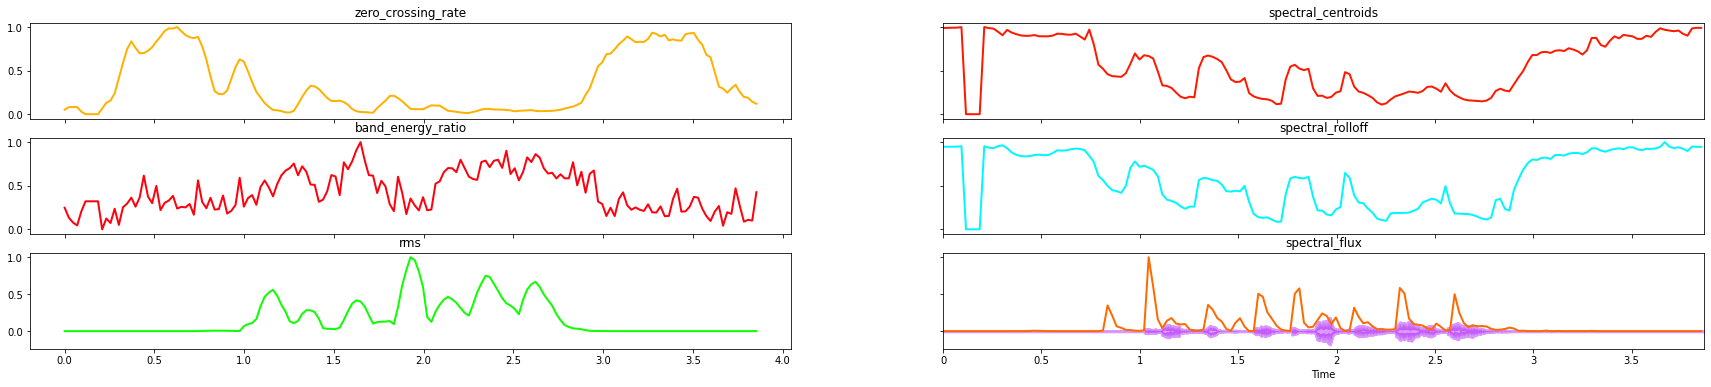

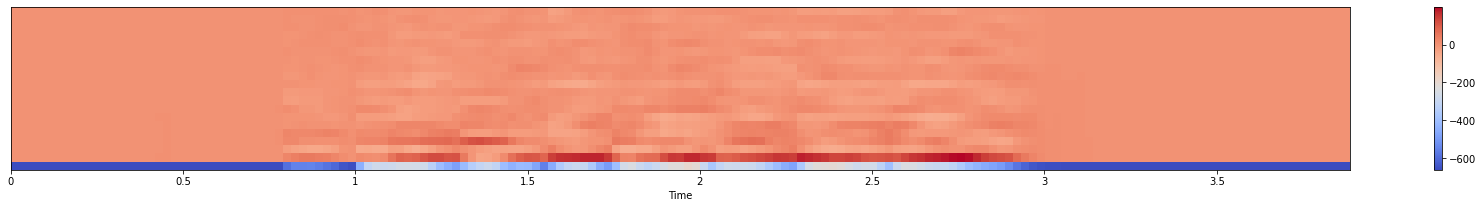

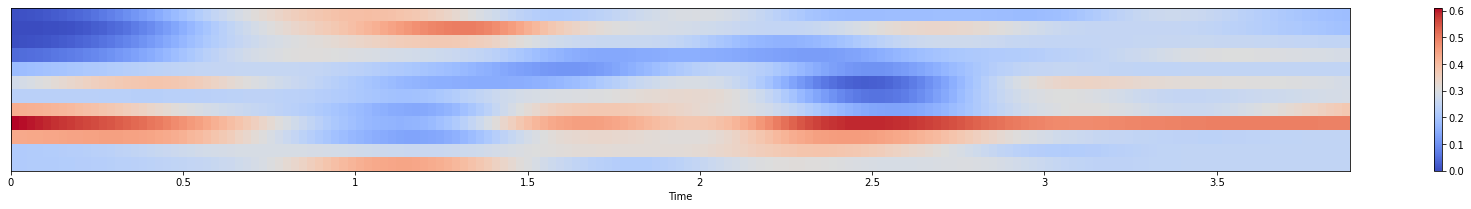

In [48]:
def create_feature_vector():
    result=np.array([])
    
    mean_zero_crossing_rate=np.mean(ex.zero_crossing_rate(),axis=0)
    result=np.hstack((result,mean_zero_crossing_rate))
    
    mean_spectral_centroid=np.mean(ex.spectral_centroid(),axis=0)
    result=np.hstack((result,mean_spectral_centroid))
    
    mean_mfcc=np.mean(ex.mfcc()[1],axis=0)
    result=np.hstack((result,mean_mfcc))
    
    mean_chroma_sens=np.mean(ex.chroma_sens()[1],axis=0)
    result=np.hstack((result,mean_chroma_sens))
    
    mean_chroma=np.mean(ex.chroma()[1],axis=0)
    result=np.hstack((result,mean_chroma))
    
    mean_band_energy_ratio=np.mean(ex.band_energy_ratio(),axis=0)
    result=np.hstack((result,mean_band_energy_ratio))
    
    mean_spectral_rolloff=np.mean(ex.spectral_rolloff(),axis=0)
    result=np.hstack((result,mean_spectral_rolloff))
    
    mean_rms=np.mean(ex.rms(),axis=0)
    result=np.hstack((result,mean_rms))
    
    mean_spectral_flux=np.mean(ex.spectral_flux(),axis=0)
    result=np.hstack((result,mean_spectral_flux))
    
    mean_tempo=np.mean(ex.tempo(),axis=0)
    result=np.hstack((result,mean_tempo))
    
    mean_onset_strength=np.mean(ex.onset_strength(),axis=0)
    result=np.hstack((result,mean_onset_strength))
    
    print(result)
    
# create_feature_vector()



ex=extract_feature(time_series_array,44000) 
# print(ex.zero_crossing_rate().shape)
# print(ex.spectral_centroid().shape)
# print(ex.mfcc().shape)
# print(ex.chroma().shape)
# print(ex.band_energy_ratio().shape)
# print(ex.spectral_rolloff().shape)
# print(ex.rms().shape)
# print(ex.spectral_flux().shape)
# print(ex.chroma_sens().shape)
# print(ex.tempo().shape)
# print(ex.onset_strength().shape)


import sklearn 
    

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

def plot_graph(zero_crossing_rate,spectral_centroids,mfcc,chroma,band_energy_ratio,spectral_rolloff,rms,spectral_flux,chroma_sens):
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    
    fig, ax = plt.subplots(3, 2, sharex='col', sharey='row',figsize = (30, 6))
     
    
    ax[0][0].plot(t, normalize(zero_crossing_rate), color='#FFB100', lw=2)
    ax[0][0].set_title("zero_crossing_rate")
    ax[0][1].plot(t, normalize(spectral_centroids), color='#ff1900', lw=2) 
    ax[0][1].set_title("spectral_centroids")
    ax[1][0].plot(t, normalize(band_energy_ratio), color='#ff000d', lw=2)
    ax[1][0].set_title("band_energy_ratio")
    ax[1][1].plot(t, normalize(spectral_rolloff), color='#00f7ff', lw=2)
    ax[1][1].set_title("spectral_rolloff")
    ax[2][0].plot(t, normalize(rms), color='#0dff00', lw=2)
    ax[2][0].set_title("rms")
    ax[2][1].plot(t, normalize(spectral_flux), color='#ff6a00', lw=2)
    ax[2][1].set_title("spectral_flux")
    librosa.display.waveplot(time_series_array, sr=44000, alpha=0.4, color = '#A300F9', lw=3) 
 
 
    fig1, ax1 = plt.subplots(figsize=(30, 3))
    img1=librosa.display.specshow(mfcc, sr=44000, x_axis='time',hop_length=1024, cmap='coolwarm')
    fig.colorbar(img1, ax=ax1)
    
    #     give a better visualization better than chroma
    fig2, ax2 = plt.subplots(figsize=(30, 3))
    img2=librosa.display.specshow(chroma_sens, sr=44000, x_axis='time',hop_length=1024, cmap='coolwarm')
    fig.colorbar(img2, ax=ax2)
    
plot_graph(ex.zero_crossing_rate(),ex.spectral_centroid(),ex.mfcc(),ex.chroma(),ex.band_energy_ratio(),ex.spectral_rolloff(),ex.rms(),ex.spectral_flux(),ex.chroma_sens())

# import librosa.display
# plt.figure(figsize=(15,3))
# librosa.display.waveplot(time_series_array,sr=sampling_rate)


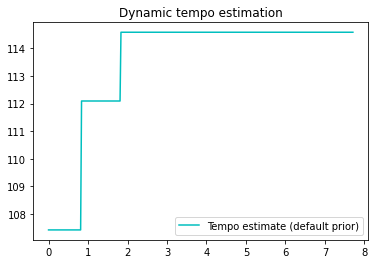

In [49]:
onset_env=librosa.onset.onset_strength(y=time_series_array, sr=44000)
dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=44000,
        aggregate=None)
# print(dtempo)
# librosa.display.specshow(tg, x_axis='time', y_axis='tempo', cmap='magma', ax=ax)
fig, ax = plt.subplots()
ax.plot(librosa.times_like(dtempo), dtempo,color='c', linewidth=1.5, label='Tempo estimate (default prior)')
ax.set(title='Dynamic tempo estimation')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
tg = librosa.feature.tempogram(onset_envelope=onset_env, sr=44000,
                               hop_length=1024)
librosa.display.specshow(tg, x_axis='time', y_axis='tempo', cmap='magma', ax=ax)
ax.plot(librosa.times_like(dtempo), dtempo,
         color='c', linewidth=1.5, label='Tempo estimate (default prior)')
ax.set(title='Dynamic tempo estimation')
ax.legend() 

# https://blog.paperspace.com/audio-analysis-processing-maching-learning/
# https://maelfabien.github.io/machinelearning/Speech9/#9-tempogram

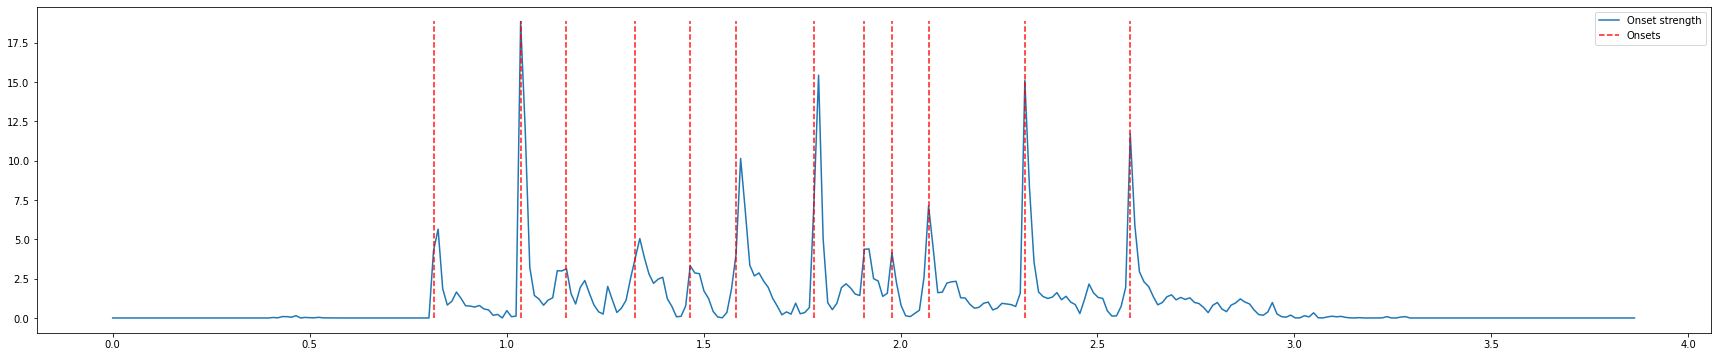

In [19]:
# onset detection graph visualization
sampling_rate=44000
o_env = librosa.onset.onset_strength(time_series_array, sr=sampling_rate)
times = librosa.times_like(o_env, sr=sampling_rate)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sampling_rate)
 
plt.figure(figsize = (30, 6)) 
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), 
             color='r', alpha=0.9,
             linestyle='--', label='Onsets')
plt.legend()
 